<a href="https://colab.research.google.com/github/MateusMurinelly/Pandas/blob/main/manipulacao_dados_MCHL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
import locale

In [44]:
df = pd.read_excel('/dados.xlsx')
df

,DATA_VENDA,MODELO,KM-LITRO,CILINDROS,PESO(KG),VELOCIDADE_MAXIMA(KM/H),CAVALOS,TRANSMISSAO,VALOR,CATEGORIA
0,10/1/2020,LABORGUINI,3.0,12,1200,360,700,AUTOMATICO,50000000,IMPORTADO
1,10/1/2020,LABORGUINI,3.0,12,1200,360,700,AUTOMATICO,50000000,IMPORTADO
2,10/1/2020,LABORGUINI,3.0,12,1200,360,700,AUTOMATICO,900000,IMPORTADO
3,10/1/2020,FERRARI,3.0,12,1400,360,640,AUTOMATICO,900000,IMPORTADO
4,10/1/2020,ASTON MARTIN,3.5,10,1600,360,620,AUTOMATICO,900000,IMPORTADO
...,...,...,...,...,...,...,...,...,...,...
981,10/12/2021,HONDA FIT,12.0,4,1700,200,116,AUTOMATICO,120000,NACIONAL
982,10/12/2021,PALIO,11.0,4,1700,200,118,MANUAL,60000,NACIONAL
983,10/12/2021,UNO,13.5,4,1700,200,118,MANUAL,48000,NACIONAL
984,10/12/2021,MOBI,14.0,4,1700,200,118,MANUAL,42000,NACIONAL


In [45]:
inicio = pd.to_datetime(df['DATA_VENDA']).dt.date.min()
fim = pd.to_datetime(df['DATA_VENDA']).dt.date.max()


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   DATA_VENDA               986 non-null    object 
 1   MODELO                   986 non-null    object 
 2   KM-LITRO                 984 non-null    float64
 3   CILINDROS                986 non-null    int64  
 4   PESO(KG)                 986 non-null    int64  
 5   VELOCIDADE_MAXIMA(KM/H)  986 non-null    int64  
 6   CAVALOS                  986 non-null    int64  
 7   TRANSMISSAO              986 non-null    object 
 8   VALOR                    986 non-null    object 
 9   CATEGORIA                986 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 77.2+ KB


In [47]:
df.loc[df['VALOR']=='SEM VALOR']

,DATA_VENDA,MODELO,KM-LITRO,CILINDROS,PESO(KG),VELOCIDADE_MAXIMA(KM/H),CAVALOS,TRANSMISSAO,VALOR,CATEGORIA
45,10/3/2020,PASSAT,8.0,6,1800,200,118,MANUAL,SEM VALOR,IMPORTADO


In [48]:
df.loc[df['VALOR']=='SEM VALOR'] = 0

In [49]:
df['VALOR'] = df['VALOR'].astype(np.float64)

In [50]:
df.loc[df['MODELO']=='PASSAT'].median()

KM-LITRO                        8.0
CILINDROS                       6.0
PESO(KG)                     1800.0
VELOCIDADE_MAXIMA(KM/H)       200.0
CAVALOS                       118.0
VALOR                      200000.0
dtype: float64

In [51]:
df.loc[(df['VALOR']==0),'VALOR']=200000

In [52]:
df.loc[df['MODELO']=='PASSAT'].median()

KM-LITRO                        8.0
CILINDROS                       6.0
PESO(KG)                     1800.0
VELOCIDADE_MAXIMA(KM/H)       200.0
CAVALOS                       118.0
VALOR                      200000.0
dtype: float64

In [53]:
df.isnull().sum()

DATA_VENDA                 0
MODELO                     0
KM-LITRO                   2
CILINDROS                  0
PESO(KG)                   0
VELOCIDADE_MAXIMA(KM/H)    0
CAVALOS                    0
TRANSMISSAO                0
VALOR                      0
CATEGORIA                  0
dtype: int64

In [54]:
df['KM-LITRO'] = df['KM-LITRO'].fillna((df['KM-LITRO'].median()))

In [55]:
variaveis_num = []
for i in df.columns[0:48].tolist():
  if df.dtypes[i] == 'int64' or df.dtypes[i] == 'float64':
    print(i,':',df.dtypes[i])
    variaveis_num.append(i)


KM-LITRO : float64
CILINDROS : int64
PESO(KG) : int64
VELOCIDADE_MAXIMA(KM/H) : int64
CAVALOS : int64
VALOR : float64


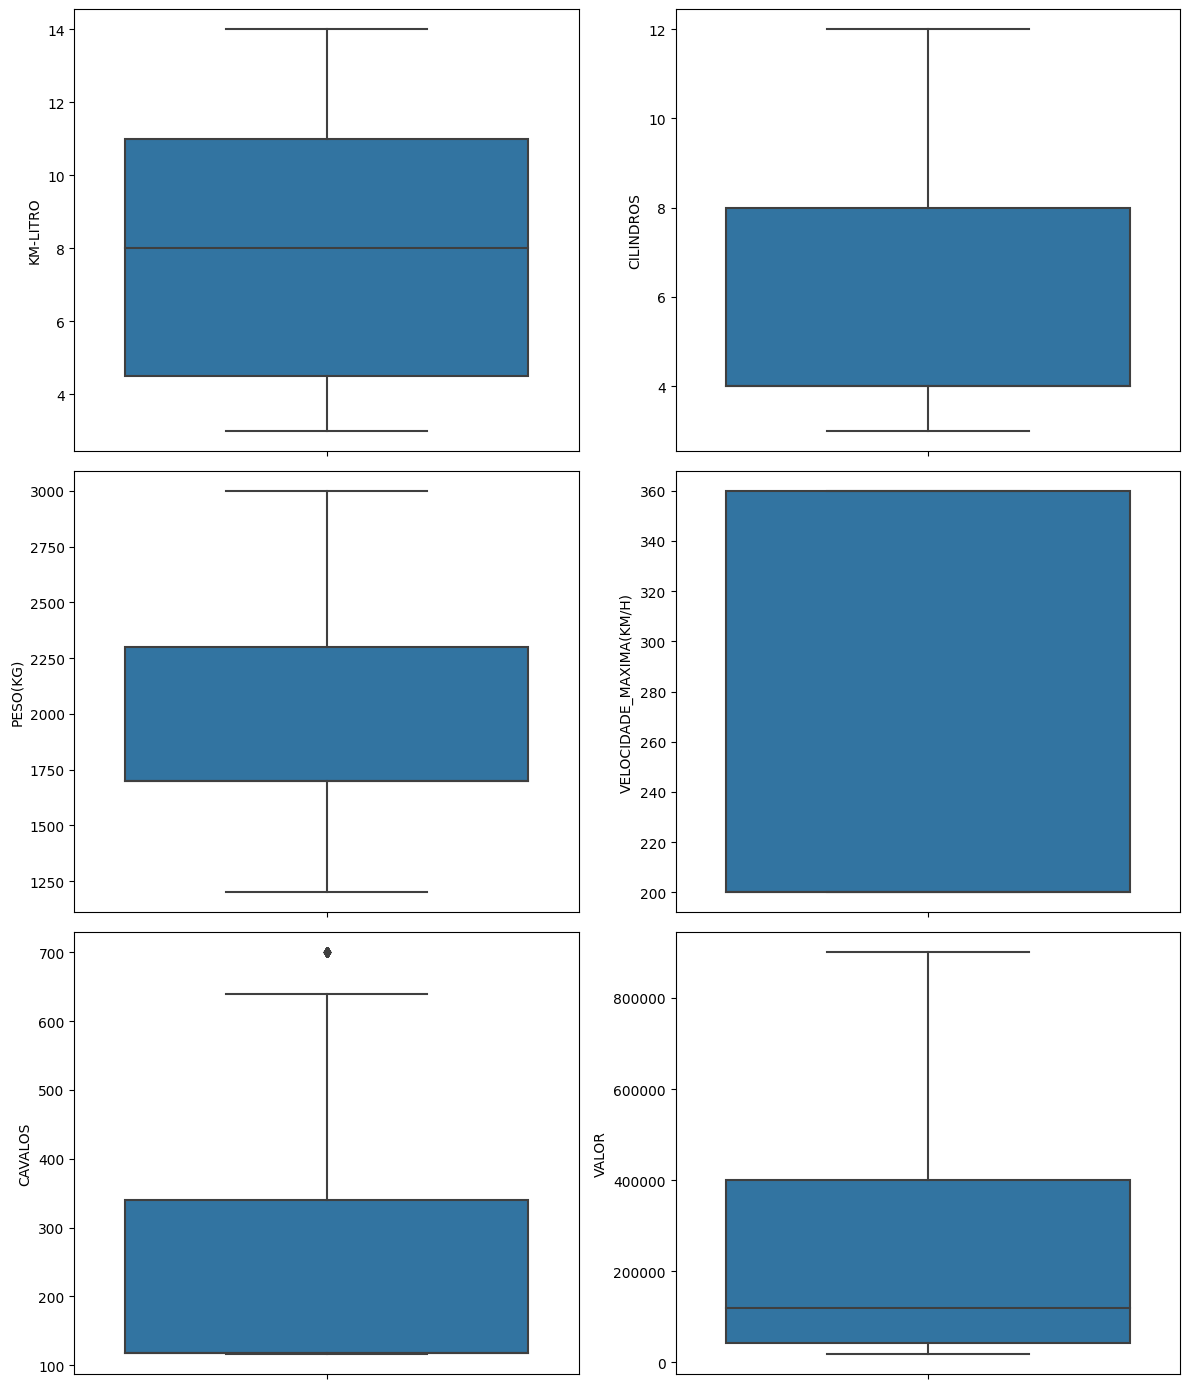

In [66]:
plt.rcParams["figure.figsize"] = [12.00,14.00]
plt.rcParams['figure.autolayout'] = True

f,axes = plt.subplots(3,2)

linha = 0 
coluna = 0

for i in variaveis_num:
  sns.boxplot(data = df,y=i,ax=axes[linha][coluna])
  coluna += 1
  if coluna == 2:
    linha += 1
    coluna = 0

plt.show() 


In [58]:
df.loc[df['CAVALOS'] > 700]

,DATA_VENDA,MODELO,KM-LITRO,CILINDROS,PESO(KG),VELOCIDADE_MAXIMA(KM/H),CAVALOS,TRANSMISSAO,VALOR,CATEGORIA
11,10/1/2020,CORSA,9.0,4,1900,200,1800,MANUAL,35000.0,NACIONAL


In [59]:
df.drop(df.loc[df['CAVALOS']==1800].index, inplace=True)

In [60]:
df.loc[df['VALOR'] > 900000]

,DATA_VENDA,MODELO,KM-LITRO,CILINDROS,PESO(KG),VELOCIDADE_MAXIMA(KM/H),CAVALOS,TRANSMISSAO,VALOR,CATEGORIA
0,10/1/2020,LABORGUINI,3.0,12,1200,360,700,AUTOMATICO,50000000.0,IMPORTADO
1,10/1/2020,LABORGUINI,3.0,12,1200,360,700,AUTOMATICO,50000000.0,IMPORTADO


In [61]:
df.loc[df['MODELO']=='LABORGUINI'].median()

KM-LITRO                        3.0
CILINDROS                      12.0
PESO(KG)                     1200.0
VELOCIDADE_MAXIMA(KM/H)       360.0
CAVALOS                       700.0
VALOR                      900000.0
dtype: float64

In [62]:
df.loc[(df['VALOR']>900000),'VALOR']=900000

In [64]:
df.loc[df['VELOCIDADE_MAXIMA(KM/H)']==0]

,DATA_VENDA,MODELO,KM-LITRO,CILINDROS,PESO(KG),VELOCIDADE_MAXIMA(KM/H),CAVALOS,TRANSMISSAO,VALOR,CATEGORIA
45,0,0,0.0,0,0,0,0,0,200000.0,0


In [65]:
df.drop(df.loc[df['VELOCIDADE_MAXIMA(KM/H)']==0].index, inplace=True)

In [67]:
df

,DATA_VENDA,MODELO,KM-LITRO,CILINDROS,PESO(KG),VELOCIDADE_MAXIMA(KM/H),CAVALOS,TRANSMISSAO,VALOR,CATEGORIA
0,10/1/2020,LABORGUINI,3.0,12,1200,360,700,AUTOMATICO,900000.0,IMPORTADO
1,10/1/2020,LABORGUINI,3.0,12,1200,360,700,AUTOMATICO,900000.0,IMPORTADO
2,10/1/2020,LABORGUINI,3.0,12,1200,360,700,AUTOMATICO,900000.0,IMPORTADO
3,10/1/2020,FERRARI,3.0,12,1400,360,640,AUTOMATICO,900000.0,IMPORTADO
4,10/1/2020,ASTON MARTIN,3.5,10,1600,360,620,AUTOMATICO,900000.0,IMPORTADO
...,...,...,...,...,...,...,...,...,...,...
981,10/12/2021,HONDA FIT,12.0,4,1700,200,116,AUTOMATICO,120000.0,NACIONAL
982,10/12/2021,PALIO,11.0,4,1700,200,118,MANUAL,60000.0,NACIONAL
983,10/12/2021,UNO,13.5,4,1700,200,118,MANUAL,48000.0,NACIONAL
984,10/12/2021,MOBI,14.0,4,1700,200,118,MANUAL,42000.0,NACIONAL


In [68]:
df_final = pd.get_dummies(df)

In [70]:
df_final

,KM-LITRO,CILINDROS,PESO(KG),VELOCIDADE_MAXIMA(KM/H),CAVALOS,VALOR,DATA_VENDA_10/1/2020,DATA_VENDA_10/1/2021,DATA_VENDA_10/10/2020,DATA_VENDA_10/10/2021,...,MODELO_PALIO,MODELO_PARATI,MODELO_PASSAT,MODELO_SAVEIRO,MODELO_UNO,MODELO_VECTRA,TRANSMISSAO_AUTOMATICO,TRANSMISSAO_MANUAL,CATEGORIA_IMPORTADO,CATEGORIA_NACIONAL
0,3.0,12,1200,360,700,900000.0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,3.0,12,1200,360,700,900000.0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,3.0,12,1200,360,700,900000.0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,3.0,12,1400,360,640,900000.0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,3.5,10,1600,360,620,900000.0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,12.0,4,1700,200,116,120000.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
982,11.0,4,1700,200,118,60000.0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
983,13.5,4,1700,200,118,48000.0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
984,14.0,4,1700,200,118,42000.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
